In [1]:
# 1.RANDOM SAMPLE IMPUTATION CONSISTS OF TAKING RANDOM OBSERVATIONS FROM THE DATASET AND WE USE THIS OBSERVATION TO REPLACE NAN VALUES

In [2]:
# IT SHOULD BE USED WHEN DATAS ARE COMPLETELY MISSING AT RANDOM

In [3]:
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
Data=pd.read_csv("Titanic.csv",usecols=['Age','Fare','Survived'])

In [4]:
Data

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [5]:
Data.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [6]:
Data['Age'].dropna().sample()

163    17.0
Name: Age, dtype: float64

In [7]:
Data['Age'].dropna().sample(Data['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [8]:
Data[Data['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [9]:
Data['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [10]:
Random_Sample=Data['Age'].dropna().sample(Data['Age'].isnull().sum(),random_state=0)
Random_Sample.index=Data[Data['Age'].isnull()].index
Random_Sample

5      28.00
17     50.00
19      0.92
26     36.00
28     26.00
       ...  
859    22.00
863    25.00
868    15.00
878    34.00
888    15.00
Name: Age, Length: 177, dtype: float64

In [11]:
def Impute_nan(Data,Variable):
    Data[Variable+'_Random']=Data[Variable]
    Random_Sample=Data[Variable].dropna().sample(Data[Variable].isnull().sum(),random_state=0)
    Random_Sample.index=Data[Data[Variable].isnull()].index
    Data.loc[Data[Variable].isnull(),Variable+'_Random']=Random_Sample

In [12]:
Impute_nan(Data,'Age')

In [13]:
Data.head(7)

,Survived,Age,Fare,Age_Random
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
5,0,NaN,8.4583,28.0
6,0,54.0,51.8625,54.0


In [14]:
print(Data['Age'].std())

14.526497332334044


In [15]:
print(Data['Age_Random'].std())

14.5636540895687


In [16]:
# 2.CAPTURING NAN VALUES WITH A NEW FEATURE

In [17]:
# WORKS WHEN DATAS ARE NOT MISSING AT RANDOM

In [18]:
import numpy as np

In [19]:
import pandas as pd
Data=pd.read_csv("Titanic.csv",usecols=['Age','Fare','Survived'])

In [20]:
Data['Age_NAN']=np.where(Data['Age'].isnull(),1,0)

In [21]:
Data

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,NaN,23.4500,1
889,1,26.0,30.0000,0


In [22]:
# 3.END OF DISTRIBUTION IMPUTATION

In [23]:
import pandas as pd
Data=pd.read_csv("Titanic.csv",usecols=['Age','Fare','Survived'])

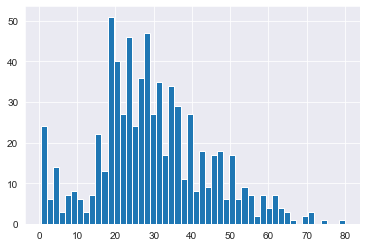

In [24]:
Data['Age'].hist(bins=50)

In [25]:
import seaborn as sns

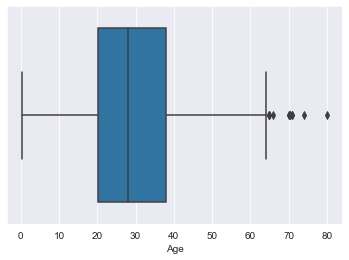

In [26]:
sns.boxplot('Age',data=Data)

In [27]:
Extreme=Data['Age'].mean()+3*Data['Age'].std()
Median=Data['Age'].median()

In [28]:
def Impute_nan(Data,Variable,Median,Extreme):
    Data[Variable+'_End_Distribution']=Data[Variable].fillna(Extreme)
    Data[Variable].fillna(Median,inplace=True)

In [29]:
Impute_nan(Data,'Age',Median,Extreme)

In [30]:
Data.head()

,Survived,Age,Fare,Age_End_Distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


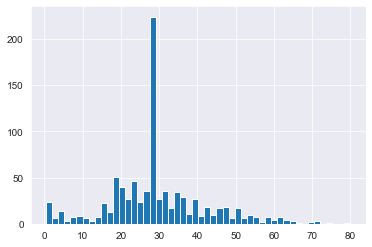

In [31]:
Data['Age'].hist(bins=50)

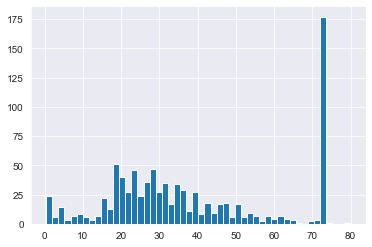

In [32]:
Data['Age_End_Distribution'].hist(bins=50)

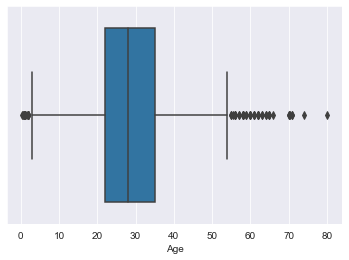

In [33]:
sns.boxplot('Age',data=Data)

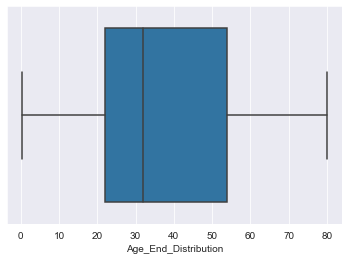

In [34]:
sns.boxplot('Age_End_Distribution',data=Data)